### Source: https://fbinter.stadt-berlin.de/fb/berlin/service_intern.jsp?id=s_vmengen2019@senstadt&type=WFS
### Documentation: https://fbinter.stadt-berlin.de/fb_daten/beschreibung/datenformatbeschreibung/Datenformatbeschreibung_Verkehrsmengen_DTVw_2019.pdf

#### Required Python packages:
    pip install owslib
    pip install pipwin
    pipwin install gdal
    pipwin install fiona
    pip install geopandas


# Read WFS capabilities and metadata:

In [2]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)

Verkehrsmengen DTVw 2019
1.0.0
['GetCapabilities', 'DescribeFeatureType', 'GetFeature']
['fis:s_vmengen2019']
{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'id': 'fis:s_vmengen2019', 'title': 'Verkehrsmengen DTVw 2019', 'abstract': 'Anzahl der Kraftfahrzeuge bzw. Lastkraftwagen (> 3,5t zul. Gesamtgewicht, ohne Busse) je 24 Stunden an Werktagen (Mo-Do) im übergeordneten Straßennetz als durchschnittliche werktägliche Verkehrsstärke (DTVw) 2019', 'keywords': ['open data,opendata,Geodaten,Berlin,Verkehr,Verkehrsmengen,Verkehrsmengenkarte,Verkehrszählung,Straßenverkehrszählung,Verkehrsstärke,Verkehrserhebungen,durchschnittliche werktägliche Verkehrsstärke,DTVw'], 'boundingBox': (369097.8529, 5799298.1358, 416865.038, 5838236.2097, urn:ogc:def:crs:EPSG::25833), 'boundingBoxWGS84': (13.079033287824634, 52.32836506534516, 

# Read WFS data:

In [1]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

In [2]:
# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

station_lat = 52.46752000
station_lon = 13.44162000
offset = 0.000001
#bounding_box = (station_lon-offset, station_lat-offset, station_lon+offset, station_lat+offset)
bounding_box = [station_lat-offset, station_lon-offset, station_lat+offset, station_lon+offset, "urn:ogc:def:crs:EPSG::25833"]

BBOX = f"{station_lat+offset},{station_lon+offset},{station_lat-offset},{station_lon-offset},urn:ogc:def:crs:EPSG::25833"
#BBOX = f"{station_lon-offset},{station_lat-offset},{station_lon+offset},{station_lat+offset}"
print (bounding_box)
print (BBOX)
#'boundingBoxWGS84': (13.079033287824634, 52.32836506534516, 13.770052656639448, 52.68766242779528)
# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='text/xml; subtype=gml/3.2.1', 
        #BBOX=BBOX)
        boundingBox=BBOX)

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

[52.467519, 13.441619000000001, 52.467521, 13.441621, 'urn:ogc:def:crs:EPSG::25833']
52.467521,13.441621,52.467519,13.441619000000001,urn:ogc:def:crs:EPSG::25833


In [3]:
len(data)

9922

### Fields
* Number of trucks: dtvw_lkw
* Number of cars: dtvw_kfz

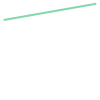

In [4]:
data[data.str_name=="Silbersteinstraße"].loc[351, "geometry"]

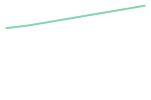

In [5]:
data[data.str_name=="Silbersteinstraße"].loc[2119, "geometry"]

In [6]:
data[data.str_name=="Silbersteinstraße"]

,gml_id,link_id,elem_nr,vnp,nnp,vst,bst,vricht,ebene,str_typ,strklasse1,strklasse,strklasse2,str_name,bezirk,stadtteil,dtvw_kfz,dtvw_lkw,geometry
351,s_vmengen2019.1314,49490054_T0038380,49490054_49490029.01,49490054,49490029,0,49,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,13100,230,"MULTILINESTRING ((394054.346 5814172.010, 3941..."
2119,s_vmengen2019.2906,48490031_T0039910,48490031_48490034.01,48490031,48490034,0,142,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7200,130,"MULTILINESTRING ((393476.824 5814075.394, 3934..."
2303,s_vmengen2019.3071,T0044010_49490054,48490015_49490054.01,48490015,49490054,76,158,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12800,230,"MULTILINESTRING ((393973.959 5814158.526, 3940..."
2994,s_vmengen2019.3694,48490007_T0038340,48490007_48490031.01,48490007,48490031,0,215,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,10400,170,"MULTILINESTRING ((393118.837 5814013.147, 3931..."
3848,s_vmengen2019.4462,T0038380_49490029,49490054_49490029.01,49490054,49490029,49,114,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,13100,230,"MULTILINESTRING ((394103.071 5814180.567, 3941..."
4272,s_vmengen2019.4844,48490009_48490015,48490009_48490015.02,48490009,48490015,0,119,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12100,240,"MULTILINESTRING ((393781.227 5814125.995, 3938..."
4656,s_vmengen2019.519,T0039910_48490034,48490031_48490034.01,48490031,48490034,142,261,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7200,130,"MULTILINESTRING ((393616.900 5814098.095, 3937..."
6490,s_vmengen2019.6840,48490034_48490009,48490034_48490009.02,48490034,48490009,0,48,B,0,S,III,G,STRA,Silbersteinstraße,Neukölln,Neukölln,12100,240,"MULTILINESTRING ((393734.109 5814117.088, 3937..."
6965,s_vmengen2019.7268,47480006_48490007,47480006_48490007.01,47480006,48490007,0,361,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,7700,110,"MULTILINESTRING ((392763.104 5813952.260, 3927..."
9363,s_vmengen2019.9426,T0038340_48490031,48490007_48490031.01,48490007,48490031,215,363,B,0,S,IV,G,STRA,Silbersteinstraße,Neukölln,Neukölln,10400,170,"MULTILINESTRING ((393330.447 5814049.248, 3934..."


In [7]:
data

,gml_id,link_id,elem_nr,vnp,nnp,vst,bst,vricht,ebene,str_typ,strklasse1,strklasse,strklasse2,str_name,bezirk,stadtteil,dtvw_kfz,dtvw_lkw,geometry
0,s_vmengen2019.1,T0087260_51580007,51580010_51580007.01,51580010,51580007,44,102,B,0,S,I,B,STRA,Berliner Allee,Pankow,Weißensee,24500,1090,"MULTILINESTRING ((396106.053 5823917.524, 3960..."
1,s_vmengen2019.10,49520002_50520019,49520002_50520019.02,49520002,50520019,0,102,B,0,S,I,B,STRA,Stralauer Allee,Friedrichshain-Kreuzberg,Friedrichshain,33600,1330,"MULTILINESTRING ((394917.969 5817928.138, 3950..."
2,s_vmengen2019.100,43540017_43540018,43540017_43540018.02,43540017,43540018,0,180,B,0,S,III,G,STRA,Tiergartenstraße,Mitte,Tiergarten,19500,440,"MULTILINESTRING ((388458.549 5819016.555, 3884..."
3,s_vmengen2019.1000,48580019_48580022,48580019_48580022.02,48580019,48580022,0,182,B,0,S,II,G,STRA,Ostseestraße,Pankow,Prenzlauer Berg,27500,980,"MULTILINESTRING ((393842.593 5823309.960, 3939..."
4,s_vmengen2019.1001,40530035_40530016,40530035_40530016.01,40530035,40530016,0,116,B,0,S,III,G,STRA,Leibnizstraße,Charlottenburg-Wilmersdorf,Charlottenburg,15700,290,"MULTILINESTRING ((385583.225 5818857.361, 3855..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,s_vmengen2019.995,44580034_44580035,44580034_44580035.01,44580034,44580035,0,50,B,0,S,II,G,STRA,Pankstraße,Mitte,Gesundbrunnen,14000,300,"MULTILINESTRING ((389571.098 5823026.381, 3895..."
9918,s_vmengen2019.996,45580001_T0065430,45580001_45580002.01,45580001,45580002,0,51,B,0,S,II,G,STRA,Badstraße,Mitte,Gesundbrunnen,31900,850,"MULTILINESTRING ((390034.624 5823810.058, 3900..."
9919,s_vmengen2019.997,44530052_44540050,44530052_44540050.02,44530052,44540050,0,168,R,-2,S,II,B,STRA,Tunnel Tiergarten Hauptfb zw Aus- u Einf Sony VSZ,Mitte,Tiergarten,16900,580,"MULTILINESTRING ((389497.280 5818975.886, 3894..."
9920,s_vmengen2019.998,44520005_45520026,44520005_45520026.01,44520005,45520026,0,144,B,0,S,III,G,STRA,Möckernstraße,Friedrichshain-Kreuzberg,Kreuzberg,11100,270,"MULTILINESTRING ((389994.243 5817268.148, 3899..."


# Aggregation of daily weather data averages 

In [20]:
import requests
import pandas as pd
start_date = "2022-01-01"
last_date = "2022-07-07"
api_url = f"https://api.brightsky.dev/weather?lat=52.465455&lon=13.422762&date={start_date}&last_date={last_date}"
dt = requests.get(api_url)

In [21]:
df = pd.DataFrame.from_dict(dt.json()["weather"])
df.index = pd.to_datetime(df['timestamp'])
df = df.resample("1d").mean()

In [22]:
df.columns

Index(['source_id', 'precipitation', 'pressure_msl', 'sunshine', 'temperature',
       'wind_direction', 'wind_speed', 'cloud_cover', 'dew_point',
       'relative_humidity', 'visibility', 'wind_gust_direction',
       'wind_gust_speed'],
      dtype='object')

In [23]:
## omit source_id (=> no weather data)
df = df.filter(items=['precipitation', 'pressure_msl', 'sunshine', 'temperature',
       'wind_direction', 'wind_speed', 'cloud_cover', 'dew_point',
       'relative_humidity', 'visibility', 'wind_gust_direction',
       'wind_gust_speed'])

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

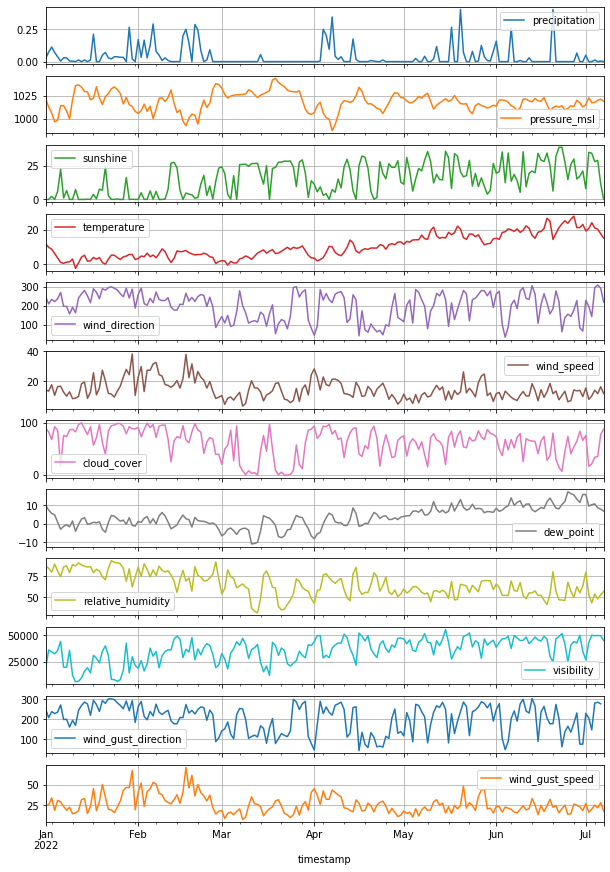

In [24]:
dfWeather = df
dfWeather.plot(subplots=True, figsize=(10, 15), grid=True)

## Fetch emission data

In [25]:
data_main = []
for i in range(1, 7):
    print(i, i+1)
    station_code = 'mc042'
    data_api = f"https://luftdaten.berlin.de/api/stations/{station_code}/data?period=1h&timespan=custom&start=01.{i}.2022%2000%3A00&end=01.{i+1}.2022%2000%3A00"
    dt = requests.get(data_api)
    data_main += dt.json()

1 2
2 3
3 4
4 5
5 6
6 7


In [26]:
len(data_main)

34792

In [27]:
station_code = 'mc042'
data_api = f"https://luftdaten.berlin.de/api/stations/{station_code}/data?period=1h&timespan=custom&start=01.01.2022%2000%3A00&end=01.07.2022%2000%3A00"
dt = requests.get(data_api)

In [28]:
df = pd.DataFrame.from_dict(data_main)
df

,datetime,station,core,component,period,value
0,2022-02-01T00:00:00+01:00,mc042,pm10,pm10_1h,1h,14.0
1,2022-02-01T00:00:00+01:00,mc042,pm2,pm2_1h,1h,11.0
2,2022-02-01T00:00:00+01:00,mc042,no2,no2_1h,1h,21.0
3,2022-02-01T00:00:00+01:00,mc042,no,no_1h,1h,2.0
4,2022-02-01T00:00:00+01:00,mc042,nox,nox_1h,1h,23.0
...,...,...,...,...,...,...
34787,2022-06-01T00:00:00+02:00,mc042,no,no_1h,1h,2.0
34788,2022-06-01T00:00:00+02:00,mc042,nox,nox_1h,1h,16.0
34789,2022-06-01T00:00:00+02:00,mc042,o3,o3_1h,1h,74.0
34790,2022-06-01T00:00:00+02:00,mc042,chb,chb_1h,1h,0.5


In [29]:
df = df.drop_duplicates(ignore_index=True)
dfP = df.pivot (index="datetime", columns=["core"], values=["value"])
dfP.index = pd.to_datetime(dfP.index, utc=True)  # convert Index => DateTimeIndex

In [30]:
dfEmission= dfP.resample ("1d").mean()

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

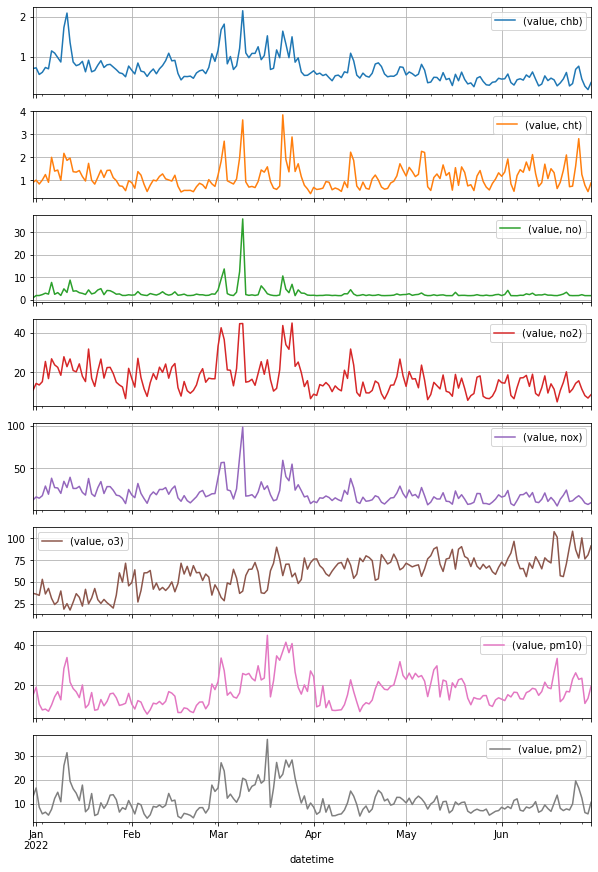

In [31]:
dfEmission.plot (subplots=True, grid=True, figsize=(10, 15))

## Street segments

In [32]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vms_detailnetz_spatial_gesamt"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)


Detailnetz Berlin
1.0.0
['GetCapabilities', 'DescribeFeatureType', 'GetFeature']
['fis:s_vms_detailnetz_spatial_gesamt']
{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'id': 'fis:s_vms_detailnetz_spatial_gesamt', 'title': 'Detailnetz  Straßenabschnitte', 'abstract': 'Informationen zum detaillierten Straßennetz von Berlin zu verkehrlichen Zwecken. Es enthält über das klassifizierte Straßennetz hinaus weitere Straßen und Wege, hier: Informationen zu Straßenabschnitten', 'keywords': ['inspireidentifiziert,open data,opendata,Geodaten,Berlin,Detailnetz,Straßennetz,Verkehrsnetz,Netz,Straßenverkehr,Brücken,Tunnel,Bauwerk,Bauwerke,Straßenabschnitt,Straßenabschnitte,Ingenieurbauwerke,Knoten-Kanten-Modell,Straßen'], 'boundingBox': (370000.0, 5800000.0, 415000.0, 5840000.0, urn:ogc:def:crs:EPSG::25833), 'boundingBoxWGS84': (13

In [127]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

def getSegments (station_lat=None, station_long=None, endpoint="https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vms_detailnetz_spatial_gesamt"):

    # Initialize
    wfs = WebFeatureService(url=endpoint)

    # Get data from WFS
    # -----------------

    # Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
    layer = list(wfs.contents)[-1]
    
    offset=1

    #bounding_box = (station_lon-offset, station_lat-offset, station_lon+offset, station_lat+offset)
    #bounding_box = [station_lat-offset, station_lon-offset, station_lat+offset, station_lon+offset, "urn:ogc:def:crs:EPSG::25833"]
    #BBOX = f"{station_lon-offset},{station_lat-offset},{station_lon+offset},{station_lat+offset}"
    #print (bounding_box)
    #print (BBOX)
    #'boundingBoxWGS84': (13.079033287824634, 52.32836506534516, 13.770052656639448, 52.68766242779528)

    # Specify the parameters for fetching the data
    
    params = dict(service='WFS', version="1.0.0", request='GetFeature',
          typeName=layer, outputFormat='text/xml; subtype=gml/3.2.1')
    
    if station_long is not None and station_lat is not None:
        BBOX = f"{station_lat+offset},{station_long+offset},{station_lat-offset},{station_long-offset},urn:ogc:def:crs:EPSG::25833"
        params["BBOX"] = BBOX

    # Parse the URL with parameters
    q = Request('GET', url, params=params).prepare().url

    # Read data from URL
    data = gpd.read_file(q)
    print (f"len(data)={len(data)}")
    
    print (f"endpoint used: {endpoint}")
    return data

data = getSegments()

len(data)=43240
endpoint used: https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vms_detailnetz_spatial_gesamt


In [116]:
data

,gml_id,element_nr,strassenschluessel,strassenname,strassenklasse1,strassenklasse,strassenklasse2,verkehrsrichtung,bezirk,stadtteil,verkehrsebene,beginnt_bei_vp,endet_bei_vp,laenge,gueltig_von,okstra_id,str_bez,geometry
0,s_vms_detailnetz_spatial_gesamt.8,34610003_34610004.01,2,Aalemannufer,IV,G,STRA,B,Spandau,Hakenfelde,0,34610003,34610004,262.50,2010-01-01T00:00:00,D62521E5E27544729878420C54E6C59C,None,"LINESTRING (379370.746 5826268.611, 379526.189..."
1,s_vms_detailnetz_spatial_gesamt.11,40540001_41540003.01,5,Abbestraße,V,G,STRA,B,Charlottenburg-Wilmersdorf,Charlottenburg,0,40540001,41540003,182.45,2010-01-01T00:00:00,275EE05309AF45DCA49E046BBA0CBBCC,None,"LINESTRING (385991.039 5819676.776, 386083.329..."
2,s_vms_detailnetz_spatial_gesamt.48,42590002_42590001.01,22,Afrikanische Straße,II,G,STRA,B,Mitte,Wedding,0,42590002,42590001,65.36,2010-01-01T00:00:00,18F55F73EB5346F6A7A719E970B9D4EC,None,"LINESTRING (387029.710 5824737.448, 387021.082..."
3,s_vms_detailnetz_spatial_gesamt.50,42590003_42590004.01,22,Afrikanische Straße,II,G,STRA,B,Mitte,Wedding,0,42590003,42590004,61.41,2010-01-01T00:00:00,AE661AB3DB344DD183550F05E15A4BD7,None,"LINESTRING (387078.894 5824336.242, 387096.357..."
4,s_vms_detailnetz_spatial_gesamt.52,42590005_42590006.01,22,Afrikanische Straße,II,G,STRA,B,Mitte,Wedding,0,42590005,42590006,45.36,2010-01-01T00:00:00,D47D9FE02F13481FA79966646BA478FA,None,"LINESTRING (387110.539 5824230.756, 387111.928..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43235,s_vms_detailnetz_spatial_gesamt.305720,39580019_39580001.01,17268,General-Ganeval-Brücke,III,G,STRA,B,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,0,39580019,39580001,119.21,2022-03-01T00:00:00,876A1D21EAC54A598500905C56B7985A,None,"LINESTRING (384465.618 5823471.782, 384474.939..."
43236,s_vms_detailnetz_spatial_gesamt.305721,39580001_39580004.02,99175,111 AS Flughafen Tegel Ausf n Flugh Tegel v N,III,G,STRA,B,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,0,39580001,39580004,107.29,2022-03-01T00:00:00,CE74982FBD4A4460A2477FE761545490,None,"LINESTRING (384512.550 5823362.211, 384518.595..."
43237,s_vms_detailnetz_spatial_gesamt.305722,39580004_39580012.01,99177,111 AS Flughafen Tegel Einf v Saatwinkler D n S,III,A,AUBA,R,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,0,39580004,39580012,343.24,2022-03-01T00:00:00,83AD048D81424B868226FCF7F1604A44,None,"LINESTRING (384552.075 5823262.529, 384552.075..."
43238,s_vms_detailnetz_spatial_gesamt.305723,39570044_39580004.01,99173,111 AS Flughafen Tegel Ausf n Flugh Tegel v S,III,A,AUBA,R,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,2,39570044,39580004,457.06,2022-03-01T00:00:00,E3211FB9ED98450AA3B2D2C77AB890D4,None,"LINESTRING (384533.905 5822845.289, 384550.970..."


In [90]:
for c in data.loc[0].geometry.coords:
    print (c)

(384363.87663676, 5809668.04930598)
(384371.02038676, 5809666.46180598)
(384452.247470093, 5809660.37638931)
(384460.040074494, 5809658.11331195)


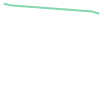

In [91]:
data.loc[0].geometry

In [94]:
# fetch measurement stations
url = "https://luftdaten.berlin.de/api/stations?active=true&include_hidden=true"
data = requests.get(url)
dfStations = pd.DataFrame.from_dict(data.json())
dfStations

,name,code,codeEu,address,lat,lng,active,stationgroups,measuringStart,measuringEnd,measuringHeight,url,information,components,activeComponents,partials,lqis,exceeds
0,010 Wedding,mc010,DEBE010,"13353 Wedding, Amrumer Str./Limburger Str.",52.54291000,13.34926000,True,[background],1984-11-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,Die Station befindet sich an der Beuth Hochsch...,"[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm2_gravi_24h, pm2_gravi_1m, pm2_gravi_1y]","[lqi, o3, pm10, no2]","[no2_1h, o3_1h, o3_8hg, pm10_24h, no2_1y, pm10..."
1,018 Schöneberg,mc018,DEBE018,"10823 Berlin, Belziger Str. 52",52.48579000,13.34885000,True,[background],1986-11-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Tempelhof-Schöneberg, auf dem Gelände des Sena...","[no_1h, no_24h, no_1m, no_1y, no2_1h, no2_24h,...","[no_1h, no_24h, no_1m, no_1y, no2_1h, no2_24h,...",[],"[lqi, no2]","[no2_1h, no2_1y]"
2,027 Marienfelde,mc027,DEBE027,"12307 Berlin, Schichauweg 60",52.39840000,13.36807500,True,[suburb],1989-04-01T00:00:00+02:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Tempelhof-Schöneberg, auf dem Versuchsfeld Mar...","[pm10_24h, no_1h, no_24h, no_1m, no_1y, no2_1h...","[no_1h, no_24h, no_1m, no_1y, no2_1h, no2_24h,...",[],"[lqi, o3, no2]","[no2_1h, o3_1h, o3_8hg, no2_1y]"
3,032 Grunewald,mc032,DEBE032,"14193 Berlin, Jagen 91",52.47319000,13.22514000,True,[suburb],1986-10-01T00:00:00+01:00,None,3.0,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Charlottenburg-Wilmersdorf, im Forst Grunewald...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...",[],"[lqi, o3, pm10, no2]","[no2_1h, o3_1h, o3_8hg, pm10_24h, no2_1y, pm10..."
4,042 Neukölln,mc042,DEBE034,"12047 Berlin, Nansenstr. 10",52.48945100,13.43084400,True,[background],1986-03-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Neukölln, auf dem Gelände einer Kindertagesstätte","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm2_gravi_24h, pm2_gravi_1m, pm2_gravi_1y, pm...","[lqi, o3, pm10, no2]","[no2_1h, o3_1h, o3_8hg, pm10_24h, no2_1y, pm10..."
5,077 Buch,mc077,DEBE051,"13125 Berlin, Hobrechtsfelder Chaussee 112",52.64410000,13.48330000,True,[suburb],1993-02-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Pankow, Ortsteil Buch, auf dem Gelände der Wal...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm2_gravi_24h, pm2_gravi_1m, pm2_gravi_1y, pm...","[lqi, o3, pm10, no2]","[no2_1h, o3_1h, o3_8hg, pm10_24h, no2_1y, pm10..."
6,085 Friedrichshagen,mc085,DEBE056,"12587 Berlin, Müggelseedamm 307-310",52.44769700,13.64705000,True,[suburb],1994-02-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Treptow-Köpenick, Ortsteil Friedrichshagen, au...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...",[],"[lqi, o3, pm10, no2]","[no2_1h, o3_1h, o3_8hg, pm10_24h, no2_1y, pm10..."
7,115 Hardenbergplatz,mc115,DEBE067,"10623 Berlin, Hardenbergplatz",52.50663000,13.33297600,True,[traffic],2004-01-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,"Charlottenburg-Wilmersdorf, in der Nähe der BV...","[no_1h, no_24h, no_1m, no_1y, no2_1h, no2_24h,...","[no_1h, no_24h, no_1m, no_1y, no2_1h, no2_24h,...",[],"[lqi, no2]","[no2_1h, no2_1y]"
8,117 Schildhornstraße,mc117,DEBE061,"12163 Berlin, Schildhornstr. 76",52.46362000,13.31832000,True,[traffic],1994-11-01T00:00:00+01:00,None,NaN,http://www.stadtentwicklung.berlin.de/umwelt/u...,Steglitz-Zehlendorf,"[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...","[pm10_1h, pm10_24h, pm10_24hg, pm10_1m, pm10_1...",[pm10_gravi_24h],"[lqi, co, pm10, no2]","[no2_1h, pm10_24h, co_8hg, no2_1y, pm10_1y]"
9,124 

In [95]:
import pyproj

In [113]:
from pyproj import Proj, transform, Transformer
gps_system='epsg:4326'
berlin_system='epsg:25833'
lat=dfStations.loc[0].lat
lng=dfStations.loc[0].lng

TRAN_4326_TO_25833 = Transformer.from_crs("EPSG:4326", "EPSG:25833")

print (f"GPS: {lat}, {lng}")
#print(transform(Proj(init=gps_system), Proj(init=berlin_system), lat, lng))  # longitude first, latitude second.

station_lat, station_lng = TRAN_4326_TO_25833.transform (lat, lng)
print (f"25833: {station_lat}, {station_lng}")
#

GPS: 52.54291000, 13.34926000
25833: 388055.8492929385, 5822705.256120888


In [128]:
getSegments (station_lat=station_lat, station_long=station_lng, endpoint="https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019")

len(data)=1
endpoint used: https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019


,gml_id,element_nr,strassenschluessel,strassenname,strassenklasse1,strassenklasse,strassenklasse2,verkehrsrichtung,bezirk,stadtteil,verkehrsebene,beginnt_bei_vp,endet_bei_vp,laenge,gueltig_von,okstra_id,geometry
0,s_vms_detailnetz_spatial_gesamt.65003,43570008_43570025.02,2803,Limburger Straße,V,G,STRA,B,Mitte,Wedding,0,43570008,43570025,220.22,2014-12-04T00:00:00,F50FCD6D5247462AA50B55857B3A1010,"LINESTRING (388008.495 5822699.975, 388018.769..."


In [1]:
getSegments (station_lat=station_lat, station_long=station_lng, endpoint="https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_vmengen2019")

NameError: name 'getSegments' is not defined